## 1. Sentiment Analysis

In [1]:
import os
import re
import pandas as pd
from string import punctuation
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
from collections import Counter
import nltk as nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# nltk.download('vader_lexicon')
%matplotlib inline

In [2]:
# Retrieve newsapi key:
news_api_key = os.getenv('NEWS_API_KEY')
# Create newsapi object:
news_api = NewsApiClient(api_key=news_api_key)

In [3]:
# Fetch Bitcoin news:
bc_news = news_api.get_everything(q='bitcoin')
# Fetch Ethereum news:
eth_news = news_api.get_everything(q='ethereum')

In [4]:
# Create the Bitcoin sentiment scores DataFrame:
bc_sentiments = []
for article in bc_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        bc_sentiments.append({
            'text':text,
            'date':date,
            'compound':compound,
            'positive':pos,
            'negative':neg,
            'neutral':neu 
        })
    except AttributeError:
        pass
# Create Bitcoin DataFrame:
bc_sentiments_df = pd.DataFrame(bc_sentiments)
# Reorder columns:
cols = ['date','text','compound','positive','negative','neutral']
bc_sentiments_df = bc_sentiments_df[cols]

In [5]:
# Create the Ethereum sentiment scores DataFrame:
eth_sentiments = []
for article in eth_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        eth_sentiments.append({
            'text':text,
            'date':date,
            'compound':compound,
            'positive':pos,
            'negative':neg,
            'neutral':neu
        })
    except AttributeError:
        pass
# Create Ethereum DataFrame:
eth_sentiments_df = pd.DataFrame(eth_sentiments)
# Reorder columns:
cols = ['date','text','compound','positive','negative','neutral']
eth_sentiments_df = eth_sentiments_df[cols]

In [6]:
# Describe the Bitcoin Sentiment:
bc_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.029845,0.045950,0.036900,0.867200
std,0.417768,0.073557,0.080967,0.231096
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.853000
50%,0.000000,0.000000,0.000000,0.935000
75%,0.064375,0.071250,0.016250,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [7]:
# Describe the Ethereum Sentiment:
eth_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.197020,0.076950,0.031150,0.89195
std,0.406770,0.067969,0.047117,0.07006
min,-0.557400,0.000000,0.000000,0.75400
25%,-0.038275,0.040500,0.000000,0.85600
50%,0.296000,0.077000,0.000000,0.91650
75%,0.449150,0.090250,0.066500,0.92750
max,0.831600,0.246000,0.145000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean positive score by about .56%


Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

## 2. Natural Language Processing
---
###   Tokenizer

Use NLTK and Python to tokenize the text for each coin and:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [8]:
# Instantiate the lemmatizer:
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords:
stop_words = set(stopwords.words('english'))
# Expand the default stopwords list if necessary:


In [9]:
## Create a tokenizer function:
def tokenizer(text):
    # Remove punctuation:
    text = re.sub(r'[^\w\s]', '', text)
    # Convert words to lowercase:
    text = text.lower()
    # Tokenize words:
    tokens = word_tokenize(text)
    # Initiate empty clean_tokens list and Lemmatize words:
    clean_tokens = []
    for w in tokens:
        clean_token = lemmatizer.lemmatize(w, pos='n')
        clean_token = lemmatizer.lemmatize(clean_token, pos='v')
        # Remove stop words:
        if clean_token not in stop_words: 
            clean_tokens.append(clean_token)
    return clean_tokens

In [10]:
# Create a new tokens column for Bitcoin:
bc_sentiments_df['tokens'] = bc_sentiments_df['text'].apply(tokenizer)
bc_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac..."
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, leave, mystery, least, far, coin..."
3,2021-03-03,,0.0000,0.000,0.000,0.000,[]
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tldr, enter, complete, bitcoin, btc, investme..."


In [11]:
# Create a new tokens column for Ethereum:
eth_sentiments_df['tokens'] = eth_sentiments_df['text'].apply(tokenizer)
eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christie, sell, first,..."
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
2,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920,"[move, fast, break, thing, get, hack, thats, h..."
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[everything, need, know, nonfungible, token, l..."
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, ha, one, handful, nft, marketplace, ..."


---

### NGrams and Frequency Analysis

Look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [12]:
# Define bigrams generator function:
def find_ngrams(input_list, n=10):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [13]:
# Generate the Bitcoin N-grams where N=2 (bigrams):
bc_sentiments_df['bigrams'] = bc_sentiments_df['tokens'].map(lambda x: find_ngrams(x, 2))
bc_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens,bigrams
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ...","[(one, strictest), (strictest, crackdown), (cr..."
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac...","[(hacker, behind), (behind, last), (last, year..."
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, leave, mystery, least, far, coin...","[(thing, best), (best, leave), (leave, mystery..."
3,2021-03-03,,0.0000,0.000,0.000,0.000,[],[]
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tldr, enter, complete, bitcoin, btc, investme...","[(tldr, enter), (enter, complete), (complete, ..."


In [14]:
# Generate the Ethereum N-grams where N=2 (bigrams):
eth_sentiments_df['bigrams'] = eth_sentiments_df['tokens'].map(lambda x: find_ngrams(x, 2))
eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens,bigrams
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christie, sell, first,...","[(famed, auction), (auction, house), (house, c..."
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ...","[(one, strictest), (strictest, crackdown), (cr..."
2,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920,"[move, fast, break, thing, get, hack, thats, h...","[(move, fast), (fast, break), (break, thing), ..."
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[everything, need, know, nonfungible, token, l...","[(everything, need), (need, know), (know, nonf..."
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, ha, one, handful, nft, marketplace, ...","[(opensea, ha), (ha, one), (one, handful), (ha..."


In [15]:
# Define function to generate the top 10 words for each coin:
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [16]:
# Create a DataFrame to store only the Bitcoin token values:
bc_tokens_df = pd.DataFrame(bc_sentiments_df['tokens'])
bc_tokens_df['tokens'] = bc_tokens_df['tokens'].apply(lambda x: ', '.join(x) )
# Merge all Bitcoin token into a single string:
bc_tokens = ''.join(bc_tokens_df['tokens'])
# Use token_count to get the top 10 words for Bitcoin:
token_count(bc_tokens.split())

[('bitcoin,', 13),
 ('photo,', 10),
 ('file,', 9),
 ('reuters,', 8),
 ('take,', 8),
 ('charreuters,', 8),
 ('staff,', 8),
 ('ha,', 7),
 ('virtual,', 7),
 ('currency,', 7)]

In [17]:
# Create a DataFrame to store only the Ethereum token values:
eth_tokens_df = pd.DataFrame(eth_sentiments_df['tokens'])
eth_tokens_df['tokens'] = eth_tokens_df['tokens'].apply(lambda x: ', '.join(x) )
# Merge all Ethereum token into a single string:
eth_tokens = ''.join(eth_tokens_df['tokens'])
# Use token_count to get the top 10 words for Ethereum:
token_count(eth_tokens.split())

[('new,', 8),
 ('cryptocurrency,', 7),
 ('million,', 5),
 ('sell,', 4),
 ('digital,', 4),
 ('reuters,', 4),
 ('token,', 4),
 ('blockchain,', 4),
 ('company,', 4),
 ('bitcoin,', 4)]

---

### Word Clouds

Generate word clouds to summarize the news for each coin

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

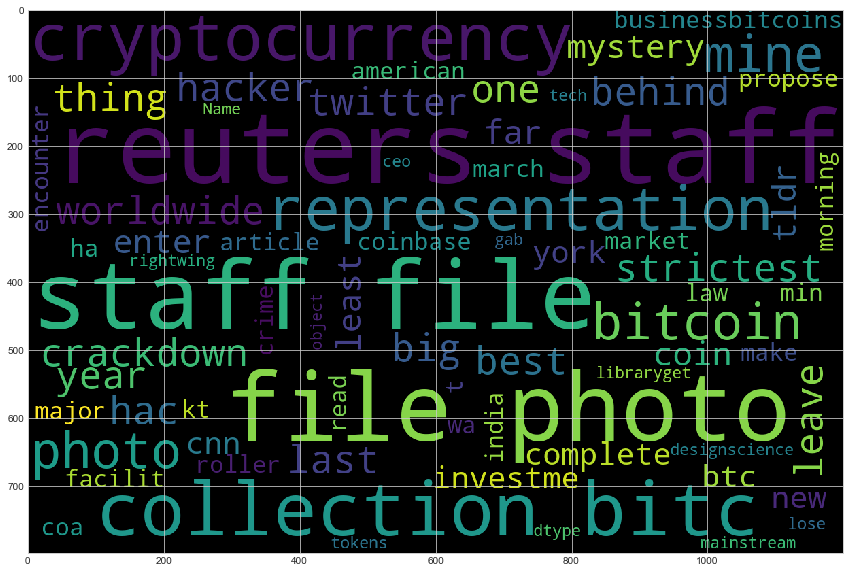

In [19]:
# Generate Bitcoin word cloud:
bc_wc_string = bc_sentiments_df['tokens'][0:]
bc_wc = WordCloud(width=1200, height=800).generate(str(bc_wc_string))
plt.imshow(bc_wc)

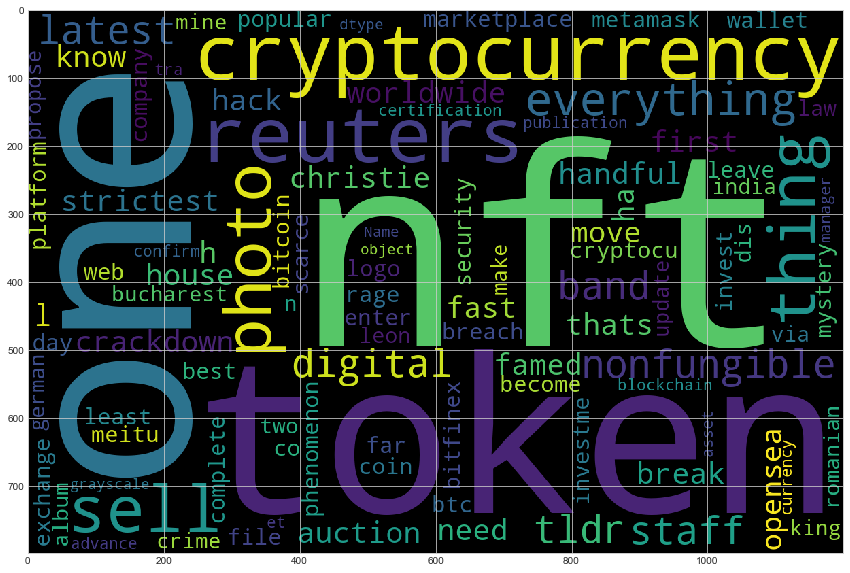

In [20]:
# Generate Ethereum word cloud:
eth_wc_string = eth_sentiments_df['tokens'][0:]
eth_wc = WordCloud(width=1200, height=800).generate(str(eth_wc_string))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [21]:
import spacy
from spacy import displacy

In [22]:
# Download the language model for SpaCy:
# !python -m spacy download en_core_web_sm

In [23]:
# Load the spaCy model:
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [24]:
# Concatenate all of the Bitcoin text together:
bc_txt = ''.join(bc_sentiments_df['text'])

In [25]:
# Run the NER processor on all of the text:
doc = nlp(bc_txt)
# Add a title to the document:
bc_news_ents = doc

In [26]:
# Render the visualization:
displacy.render(bc_news_ents,style='ent')

In [31]:
# List Bitcoin news Entities:
for ent in bc_news_ents.ents:
    print(f'Entity: {ent.text} | Type: {ent.label_}')

Entity: One, Type: CARDINAL
Entity: Photo, Type: PERSON
Entity: Michele Doying, Type: PERSON
Entity: India, Type: GPE
Entity: Reuters, Type: ORG
Entity: last years, Type: DATE
Entity: Twitter, Type: PRODUCT
Entity: Graham Ivan Clark, Type: PERSON
Entity: Twitters, Type: NORP
Entity: Coinbase, Type: NORP
Entity: San Francisco, Type: GPE
Entity: last year, Type: DATE
Entity: Thursday, Type: DATE
Entity: over $12,000, Type: MONEY
Entity: CNN, Type: ORG
Entity: above $58,000, Type: MONEY
Entity: Sunday, Type: DATE
Entity: just above $46,000, Type: MONEY
Entity: Tuesday, Type: DATE
Entity: India, Type: GPE
Entity: Reuters, Type: ORG
Entity: Coinbase, Type: WORK_OF_ART
Entity: American, Type: NORP
Entity: Reuters, Type: ORG
Entity: Dec. 8, 2017, Type: DATE
Entity: Benoit Tessier/Illustration, Type: ORG
Entity: Reuters, Type: ORG
Entity: Reuters, Type: ORG
Entity: Bitcoin, Type: PERSON
Entity: January 21, 2021, Type: DATE
Entity: Reuters, Type: ORG
Entity: 23, 2021, Type: DATE
Entity: Spanish

---

### Ethereum NER

In [37]:
# Concatenate all of the Ethereum text together:
eth_txt = ''.join(eth_sentiments_df['text'])

In [38]:
# Run the NER processor on all of the text:
doc = nlp(eth_txt)
# Add a title to the document:
eth_news_ents = doc

In [39]:
# Render the visualization:
displacy.render(eth_news_ents,style='ent')

In [41]:
# List Ethereum news Entities:
for ent in eth_news_ents.ents:
    print(f'Entity: {ent.text} | Type: {ent.label_}')

Entity: Christies | Type: ORG
Entity: first | Type: ORDINAL
Entity: $69 million | Type: MONEY
Entity: 5,000 | Type: CARDINAL
Entity: Photo | Type: PERSON
Entity: Michele Doying | Type: PERSON
Entity: India | Type: GPE
Entity: Reuters | Type: ORG
Entity: Ethereum | Type: ORG
Entity: here.)OpenSea | Type: GPE
Entity: NFT | Type: ORG
Entity: recent weeks | Type: DATE
Entity: these days | Type: DATE
Entity: Kings | Type: PERSON
Entity: NBA | Type: ORG
Entity: millions | Type: CARDINAL
Entity: Ethereum | Type: ORG
Entity: chars]MetaMask | Type: ORG
Entity: one | Type: CARDINAL
Entity: Ethereum | Type: ORG
Entity: September 2020 | Type: DATE
Entity: about $5.7 million | Type: MONEY
Entity: Coinbase | Type: NORP
Entity: San Francisco | Type: GPE
Entity: last year | Type: DATE
Entity: Thursday | Type: DATE
Entity: Bitfinex | Type: ORG
Entity: Bitfinex | Type: ORG
Entity: millions of dollars | Type: MONEY
Entity: Reuters | Type: ORG
Entity: Meitu | Type: ORG
Entity: Hong Kong | Type: GPE
Entity

---